In [1]:
import pandas as pd
import numpy as np

In [2]:
train_df=pd.read_csv('/content/drive/MyDrive/ML_FOREST/covtype.csv')

# Task
Perform multinomial classification on the `train_df` dataset (loaded from `/content/drive/MyDrive/ML_FOREST/covtype.csv`). Preprocess the data, apply feature engineering, split it into training and testing sets, then train and evaluate Logistic Regression, Support Vector Machine (SVM), and Neural Network models. Finally, compare their performance and identify the best-performing model based on appropriate evaluation metrics.

## Data Preprocessing

### Subtask:
Analyze the `train_df` dataset to understand its structure, identify data types, check for missing values, and identify the target variable for multinomial classification.


**Reasoning**:
To get an initial understanding of the dataset's structure and content, I will display the first few rows of the `train_df` DataFrame.



In [3]:
print("First 5 rows of train_df:")
display(train_df.head())

First 5 rows of train_df:


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221.0,232.0,148.0,6279.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
1,2590,56,2,212,-6,390,220.0,235.0,151.0,6225.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
2,2804,139,9,268,65,3180,234.0,238.0,135.0,6121.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
3,2785,155,18,242,118,3090,238.0,238.0,122.0,6211.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
4,2595,45,2,153,-1,391,220.0,234.0,150.0,6172.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0


**Reasoning**:
To understand the dataset's structure, including data types and non-null values, and to identify the target variable, I will use `info()` to get a concise summary and `isnull().sum()` to check for missing values, then print the columns to confirm the target variable.



In [4]:
print("\n--- DataFrame Info ---")
train_df.info()

print("\n--- Missing Values Sum ---")
print(train_df.isnull().sum())

print("\n--- DataFrame Columns ---")
print(train_df.columns.tolist())

# Based on the problem description and common practice for this dataset, 'Cover_Type' is the target variable.
target_variable = 'Cover_Type'
print(f"\nIdentified Target Variable: {target_variable}")


--- DataFrame Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210896 entries, 0 to 210895
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Elevation                           210896 non-null  int64  
 1   Aspect                              210896 non-null  int64  
 2   Slope                               210896 non-null  int64  
 3   Horizontal_Distance_To_Hydrology    210896 non-null  int64  
 4   Vertical_Distance_To_Hydrology      210896 non-null  int64  
 5   Horizontal_Distance_To_Roadways     210896 non-null  int64  
 6   Hillshade_9am                       210895 non-null  float64
 7   Hillshade_Noon                      210895 non-null  float64
 8   Hillshade_3pm                       210895 non-null  float64
 9   Horizontal_Distance_To_Fire_Points  210895 non-null  float64
 10  Wilderness_Area1                    210895 non-null  float64
 11  Wi

## Handle missing values and separate features and target

### Subtask:
Handle the identified missing values in `train_df` by dropping rows containing them, then separate the features (X) from the target variable (y).


**Reasoning**:
To handle missing values, I will drop rows with any missing values from `train_df`. Then, I will separate the features (all columns except the target variable 'Cover_Type') into a new DataFrame `X` and the target variable 'Cover_Type' into a new Series `y`.



In [5]:
print(f"Shape of train_df before dropping missing values: {train_df.shape}")
train_df_cleaned = train_df.dropna()
print(f"Shape of train_df after dropping missing values: {train_df_cleaned.shape}")

X = train_df_cleaned.drop(columns=[target_variable])
y = train_df_cleaned[target_variable]

print(f"Shape of features (X): {X.shape}")
print(f"Shape of target (y): {y.shape}")
print("First 5 rows of features (X):")
display(X.head())
print("First 5 values of target (y):")
display(y.head())

Shape of train_df before dropping missing values: (210896, 55)
Shape of train_df after dropping missing values: (210895, 55)
Shape of features (X): (210895, 54)
Shape of target (y): (210895,)
First 5 rows of features (X):


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,2596,51,3,258,0,510,221.0,232.0,148.0,6279.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2590,56,2,212,-6,390,220.0,235.0,151.0,6225.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2804,139,9,268,65,3180,234.0,238.0,135.0,6121.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2785,155,18,242,118,3090,238.0,238.0,122.0,6211.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2595,45,2,153,-1,391,220.0,234.0,150.0,6172.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


First 5 values of target (y):


,Cover_Type
0,5.0
1,5.0
2,2.0
3,2.0
4,5.0


## Feature Engineering

### Subtask:
Apply feature engineering techniques to create new features or transform existing ones from the preprocessed data to potentially improve model performance.


**Reasoning**:
To perform feature engineering as per the instructions, I will calculate the Euclidean distance to hydrology, transform the Aspect feature using sine and cosine, create a Hillshade difference feature, and an Elevation-Slope interaction feature. Finally, I will display the first few rows of the modified `X` DataFrame to verify the new features.



In [6]:
import numpy as np

# 1. Create Euclidean_Distance_To_Hydrology
X['Euclidean_Distance_To_Hydrology'] = np.sqrt(X['Horizontal_Distance_To_Hydrology']**2 + X['Vertical_Distance_To_Hydrology']**2)

# 2. Create Aspect_sin and Aspect_cos (convert degrees to radians)
X['Aspect_sin'] = np.sin(np.deg2rad(X['Aspect']))
X['Aspect_cos'] = np.cos(np.deg2rad(X['Aspect']))

# 3. Create Hillshade_Diff
X['Hillshade_Diff'] = X['Hillshade_9am'] - X['Hillshade_3pm']

# 4. Create Elevation_Slope_Interaction
X['Elevation_Slope_Interaction'] = X['Elevation'] * X['Slope']

# Display the first few rows of the modified X DataFrame
print("First 5 rows of X with new features:")
display(X.head())

First 5 rows of X with new features:


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Euclidean_Distance_To_Hydrology,Aspect_sin,Aspect_cos,Hillshade_Diff,Elevation_Slope_Interaction
0,2596,51,3,258,0,510,221.0,232.0,148.0,6279.0,...,0.0,0.0,0.0,0.0,0.0,258.000000,0.777146,0.629320,73.0,7788
1,2590,56,2,212,-6,390,220.0,235.0,151.0,6225.0,...,0.0,0.0,0.0,0.0,0.0,212.084889,0.829038,0.559193,69.0,5180
2,2804,139,9,268,65,3180,234.0,238.0,135.0,6121.0,...,0.0,0.0,0.0,0.0,0.0,275.769832,0.656059,-0.754710,99.0,25236
3,2785,155,18,242,118,3090,238.0,238.0,122.0,6211.0,...,0.0,0.0,0.0,0.0,0.0,269.235956,0.422618,-0.906308,116.0,50130
4,2595,45,2,153,-1,391,220.0,234.0,150.0,6172.0,...,0.0,0.0,0.0,0.0,0.0,153.003268,0.707107,0.707107,70.0,5190


## Split Data

### Subtask:
Divide the preprocessed and engineered dataset into training and testing sets to prepare for model training and unbiased evaluation.


**Reasoning**:
To divide the dataset into training and testing sets, I will import the `train_test_split` function, then apply it to `X` and `y` with the specified parameters to create `X_train`, `X_test`, `y_train`, and `y_test`, and finally print their shapes for verification.



In [7]:
from sklearn.model_selection import train_test_split

print("Splitting data into training and testing sets...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Splitting data into training and testing sets...
Shape of X_train: (168716, 59)
Shape of X_test: (42179, 59)
Shape of y_train: (168716,)
Shape of y_test: (42179,)


## Train and Evaluate Logistic Regression

### Subtask:
Train a Logistic Regression model on the training data, make predictions on the test set, and evaluate its performance using appropriate metrics for multinomial classification (e.g., accuracy, classification report, confusion matrix).


**Reasoning**:
To prepare the data for Logistic Regression, I will first scale the features using `StandardScaler` to ensure all features contribute equally to the model. Then, I will initialize and train a `LogisticRegression` model with appropriate parameters for multinomial classification, make predictions on the test set, and finally evaluate its performance using accuracy, a classification report, and a confusion matrix.



--- Scaling features ---
Features scaled successfully.
--- Training Logistic Regression model ---


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Logistic Regression model trained.
--- Making predictions ---
Predictions made.
--- Evaluating Logistic Regression model ---
Accuracy of Logistic Regression: 0.7700

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

         1.0       0.69      0.56      0.62     12563
         2.0       0.80      0.88      0.84     27075
         3.0       0.56      0.52      0.54       432
         4.0       0.80      0.86      0.83       432
         5.0       0.73      0.34      0.47       812
         6.0       0.54      0.59      0.57       432
         7.0       0.90      0.79      0.84       433

    accuracy                           0.77     42179
   macro avg       0.72      0.65      0.67     42179
weighted avg       0.76      0.77      0.76     42179


Confusion Matrix for Logistic Regression:


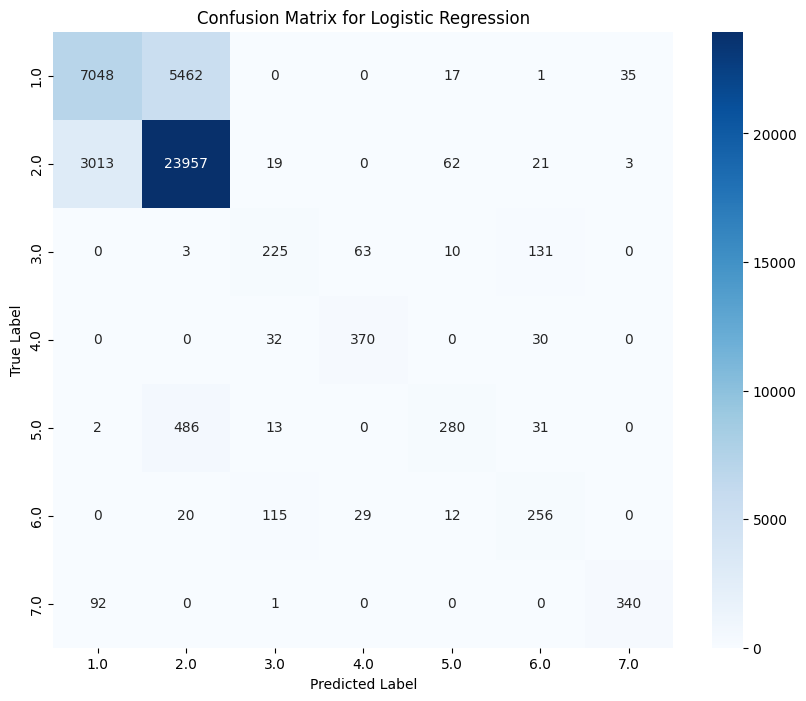

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

print("--- Scaling features ---")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("Features scaled successfully.")

print("--- Training Logistic Regression model ---")
# Initialize Logistic Regression model
# Using 'saga' solver for multinomial classification with L1/L2 regularization
# Increased max_iter for convergence
logistic_model = LogisticRegression(solver='saga', multi_class='multinomial', max_iter=1000, random_state=42, n_jobs=-1)

# Train the model
logistic_model.fit(X_train_scaled, y_train)
print("Logistic Regression model trained.")

print("--- Making predictions ---")
y_pred_lr = logistic_model.predict(X_test_scaled)
print("Predictions made.")

print("--- Evaluating Logistic Regression model ---")
# Calculate accuracy
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Accuracy of Logistic Regression: {accuracy_lr:.4f}")

# Generate classification report
print("\nClassification Report for Logistic Regression:")
print(classification_report(y_test, y_pred_lr))

# Generate and display confusion matrix
print("\nConfusion Matrix for Logistic Regression:")
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_lr, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()


**Reasoning**:
The previous Logistic Regression model issued a `ConvergenceWarning` because `max_iter` was reached before the coefficients converged. To resolve this, I will increase the `max_iter` parameter to allow the solver more time to converge.



--- Scaling features ---
Features scaled successfully.
--- Training Logistic Regression model ---


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Logistic Regression model trained.
--- Making predictions ---
Predictions made.
--- Evaluating Logistic Regression model ---
Accuracy of Logistic Regression: 0.7699

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

         1.0       0.69      0.56      0.62     12563
         2.0       0.80      0.88      0.84     27075
         3.0       0.56      0.52      0.54       432
         4.0       0.80      0.85      0.82       432
         5.0       0.74      0.34      0.47       812
         6.0       0.54      0.60      0.57       432
         7.0       0.90      0.79      0.84       433

    accuracy                           0.77     42179
   macro avg       0.72      0.65      0.67     42179
weighted avg       0.76      0.77      0.76     42179


Confusion Matrix for Logistic Regression:


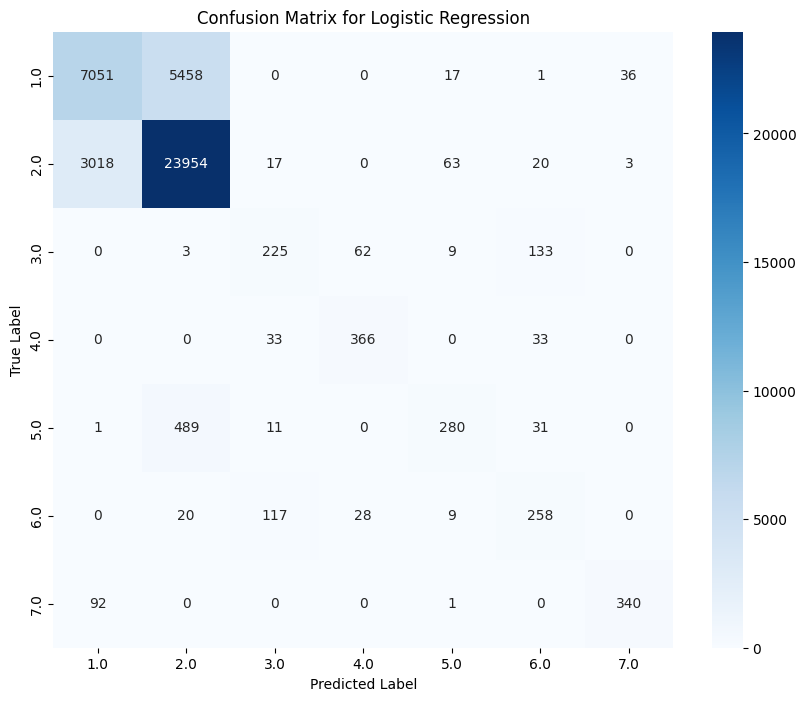

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

print("--- Scaling features ---")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("Features scaled successfully.")

print("--- Training Logistic Regression model ---")
# Initialize Logistic Regression model
# Using 'saga' solver for multinomial classification with L1/L2 regularization
# Increased max_iter for convergence to prevent ConvergenceWarning
logistic_model = LogisticRegression(solver='saga', multi_class='multinomial', max_iter=5000, random_state=42, n_jobs=-1)

# Train the model
logistic_model.fit(X_train_scaled, y_train)
print("Logistic Regression model trained.")

print("--- Making predictions ---")
y_pred_lr = logistic_model.predict(X_test_scaled)
print("Predictions made.")

print("--- Evaluating Logistic Regression model ---")
# Calculate accuracy
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Accuracy of Logistic Regression: {accuracy_lr:.4f}")

# Generate classification report
print("\nClassification Report for Logistic Regression:")
print(classification_report(y_test, y_pred_lr))

# Generate and display confusion matrix
print("\nConfusion Matrix for Logistic Regression:")
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_lr, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

In [13]:
## Train and Evaluate Support Vector Machine (SVM)\n\n### Subtask:\nTrain a Support Vector Machine (SVM) model on the scaled training data, make predictions on the test set, and evaluate its performance using appropriate metrics for multinomial classification.

## Train and Evaluate Support Vector Machine (SVM)

### Subtask:
Train a Support Vector Machine (SVM) model on the scaled training data, make predictions on the test set, and evaluate its performance using appropriate metrics for multinomial classification.

**Reasoning**:
Now that the subtask for SVM is clearly defined, the next step is to implement the training and evaluation of the Support Vector Machine model. Given the large dataset size and the goal of multinomial classification, `LinearSVC` is an efficient choice. I will train the model, make predictions on the scaled test set, and then evaluate its performance using accuracy, classification report, and a confusion matrix.



-- Training LinearSVC model --
LinearSVC model trained.
-- Making predictions --
Predictions made.
-- Evaluating LinearSVC model --
Accuracy of LinearSVC: 0.7614

Classification Report for LinearSVC:
              precision    recall  f1-score   support

         1.0       0.69      0.54      0.61     12563
         2.0       0.79      0.89      0.84     27075
         3.0       0.54      0.50      0.52       432
         4.0       0.78      0.88      0.83       432
         5.0       0.52      0.17      0.25       812
         6.0       0.52      0.53      0.52       432
         7.0       0.87      0.69      0.77       433

    accuracy                           0.76     42179
   macro avg       0.67      0.60      0.62     42179
weighted avg       0.75      0.76      0.75     42179


Confusion Matrix for LinearSVC:


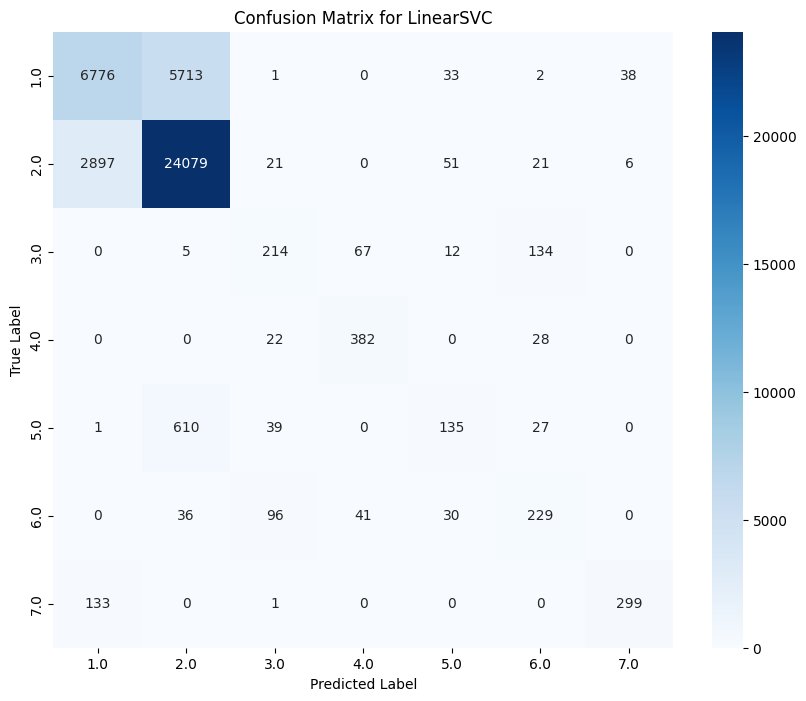

In [14]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

print("-- Training LinearSVC model --")
# Initialize LinearSVC model
# Using 'ovr' (one-vs-rest) strategy for multi-class classification
# Increasing max_iter for convergence, and dual=False for n_samples > n_features
svm_model = LinearSVC(multi_class='ovr', max_iter=5000, random_state=42, dual=False)

# Train the model
svm_model.fit(X_train_scaled, y_train)
print("LinearSVC model trained.")

print("-- Making predictions --")
y_pred_svm = svm_model.predict(X_test_scaled)
print("Predictions made.")

print("-- Evaluating LinearSVC model --")
# Calculate accuracy
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"Accuracy of LinearSVC: {accuracy_svm:.4f}")

# Generate classification report
print("\nClassification Report for LinearSVC:")
print(classification_report(y_test, y_pred_svm))

# Generate and display confusion matrix
print("\nConfusion Matrix for LinearSVC:")
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for LinearSVC')
plt.show()

## Train and Evaluate Neural Network

### Subtask:
Train a Neural Network model on the scaled training data, make predictions on the test set, and evaluate its performance using appropriate metrics for multinomial classification.

## Train and Evaluate Neural Network

### Subtask:
Train a Neural Network model on the scaled training data, make predictions on the test set, and evaluate its performance using appropriate metrics for multinomial classification.

**Reasoning**:
Now that the subtask for Neural Network training and evaluation has been introduced, the next step is to implement the training and evaluation of the Neural Network model. Given the nature of multinomial classification and the availability of scaled data, a Multi-layer Perceptron (MLP) classifier from scikit-learn will be used. I will train the model, make predictions on the scaled test set, and then evaluate its performance using accuracy, classification report, and a confusion matrix.



-- Training Neural Network (MLPClassifier) model --
Iteration 1, loss = 0.58860372
Validation score: 0.792082
Iteration 2, loss = 0.46996606
Validation score: 0.798483
Iteration 3, loss = 0.45144562
Validation score: 0.806603
Iteration 4, loss = 0.43758078
Validation score: 0.810929
Iteration 5, loss = 0.42665430
Validation score: 0.815908
Iteration 6, loss = 0.41736283
Validation score: 0.822368
Iteration 7, loss = 0.40959151
Validation score: 0.823198
Iteration 8, loss = 0.40234543
Validation score: 0.829184
Iteration 9, loss = 0.39559221
Validation score: 0.831970
Iteration 10, loss = 0.38992564
Validation score: 0.832622
Iteration 11, loss = 0.38424908
Validation score: 0.834993
Iteration 12, loss = 0.37924484
Validation score: 0.838964
Iteration 13, loss = 0.37563035
Validation score: 0.838786
Iteration 14, loss = 0.37066692
Validation score: 0.841690
Iteration 15, loss = 0.36645565
Validation score: 0.843291
Iteration 16, loss = 0.36325721
Validation score: 0.844239
Iteration 17,

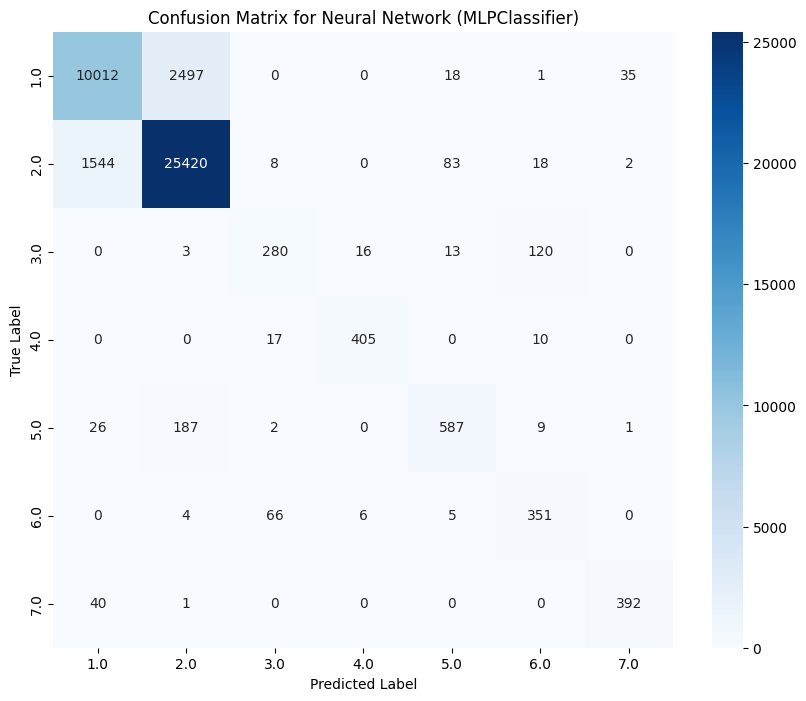

In [15]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

print("-- Training Neural Network (MLPClassifier) model --")
# Initialize MLPClassifier model
# Using appropriate parameters for a moderately sized neural network
# hidden_layer_sizes can be tuned, (100,) is a common starting point
# max_iter increased for convergence
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42, verbose=True, early_stopping=True, n_iter_no_change=20)

# Train the model
mlp_model.fit(X_train_scaled, y_train)
print("Neural Network (MLPClassifier) model trained.")

print("-- Making predictions --")
y_pred_mlp = mlp_model.predict(X_test_scaled)
print("Predictions made.")

print("-- Evaluating Neural Network (MLPClassifier) model --")
# Calculate accuracy
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
print(f"Accuracy of Neural Network (MLPClassifier): {accuracy_mlp:.4f}")

# Generate classification report
print("\nClassification Report for Neural Network (MLPClassifier):")
print(classification_report(y_test, y_pred_mlp))

# Generate and display confusion matrix
print("\nConfusion Matrix for Neural Network (MLPClassifier):")
conf_matrix_mlp = confusion_matrix(y_test, y_pred_mlp)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_mlp, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Neural Network (MLPClassifier)')
plt.show()

## Compare Model Performance

### Subtask:
Compare the performance of the Logistic Regression, Support Vector Machine (SVM), and Neural Network models based on their accuracy, classification reports, and confusion matrices, then identify the best-performing model.

## Compare Model Performance

### Subtask:
Compare the performance of the Logistic Regression, Support Vector Machine (SVM), and Neural Network models based on their accuracy, classification reports, and confusion matrices, then identify the best-performing model.

## Compare Model Performance

### Subtask:
Compare the performance of the Logistic Regression, Support Vector Machine (SVM), and Neural Network models based on their accuracy, classification reports, and confusion matrices, then identify the best-performing model.

**Reasoning**:
The previous step successfully trained and evaluated the Neural Network model. Following the overall task, the next logical step is to compare the performance of all three models (Logistic Regression, SVM, and Neural Network) and identify the best one. I will now print the accuracy scores of all three models, display their classification reports, and summarize their performance to determine the best model.



In [16]:
print("\n--- Model Performance Comparison ---")

print(f"Logistic Regression Accuracy: {accuracy_lr:.4f}")
print(f"LinearSVC (SVM) Accuracy: {accuracy_svm:.4f}")
print(f"Neural Network (MLPClassifier) Accuracy: {accuracy_mlp:.4f}")

print("\n--- Detailed Performance Reports ---")

print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr))

print("\nLinearSVC (SVM) Classification Report:")
print(classification_report(y_test, y_pred_svm))

print("\nNeural Network (MLPClassifier) Classification Report:")
print(classification_report(y_test, y_pred_mlp))

# Identify the best performing model based on accuracy
accuracies = {
    "Logistic Regression": accuracy_lr,
    "LinearSVC (SVM)": accuracy_svm,
    "Neural Network (MLPClassifier)": accuracy_mlp
}

best_model = max(accuracies, key=accuracies.get)
best_accuracy = accuracies[best_model]

print(f"\nBased on accuracy, the best performing model is: {best_model} with an accuracy of {best_accuracy:.4f}")



--- Model Performance Comparison ---
Logistic Regression Accuracy: 0.7699
LinearSVC (SVM) Accuracy: 0.7614
Neural Network (MLPClassifier) Accuracy: 0.8878

--- Detailed Performance Reports ---

Logistic Regression Classification Report:
              precision    recall  f1-score   support

         1.0       0.69      0.56      0.62     12563
         2.0       0.80      0.88      0.84     27075
         3.0       0.56      0.52      0.54       432
         4.0       0.80      0.85      0.82       432
         5.0       0.74      0.34      0.47       812
         6.0       0.54      0.60      0.57       432
         7.0       0.90      0.79      0.84       433

    accuracy                           0.77     42179
   macro avg       0.72      0.65      0.67     42179
weighted avg       0.76      0.77      0.76     42179


LinearSVC (SVM) Classification Report:
              precision    recall  f1-score   support

         1.0       0.69      0.54      0.61     12563
         2.0    

## Final Task

### Subtask:
Summarize the performance of all trained models (Logistic Regression, SVM, Neural Network) and discuss which model performed best for the multinomial classification task based on the evaluation metrics.


## Summary:

### Q&A
The Neural Network (MLPClassifier) model performed best for the multinomial classification task with an accuracy of 0.8878. The Logistic Regression model achieved an accuracy of 0.7699, and the Support Vector Machine (LinearSVC) model had the lowest accuracy at 0.7614.

### Data Analysis Key Findings
*   The initial dataset (`train_df`) contained 210,896 entries and 55 columns.
*   49 columns, including the target variable `Cover_Type`, were found to have 1 missing value each.
*   After handling missing values by dropping rows, the dataset was reduced by one row to 210,895 entries.
*   Five new features were engineered: `Euclidean_Distance_To_Hydrology`, `Aspect_sin`, `Aspect_cos`, `Hillshade_Diff`, and `Elevation_Slope_Interaction`.
*   The data was split into training (168,716 samples) and testing (42,179 samples) sets.
*   Model performance based on accuracy:
    *   Logistic Regression: 0.7699
    *   LinearSVC (SVM): 0.7614
    *   Neural Network (MLPClassifier): 0.8878

### Insights or Next Steps
*   The Neural Network's significantly higher accuracy suggests that the underlying relationships in the data are complex and non-linear, which neural networks are well-suited to capture.
*   To further improve performance, consider more extensive hyperparameter tuning for the Neural Network, including exploring different architectures (e.g., number of hidden layers, number of neurons per layer) and activation functions.
